### Import các Thư viện cần thiết

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

### Tải và Tiền xử lý Dữ liệu CIFAR-10

Kích thước tập huấn luyện ban đầu: x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 1)
Kích thước tập kiểm tra ban đầu: x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 1)
Kích thước nhãn huấn luyện sau one-hot: y_train_categorical shape: (50000, 10)
Kích thước nhãn kiểm tra sau one-hot: y_test_categorical shape: (10000, 10)


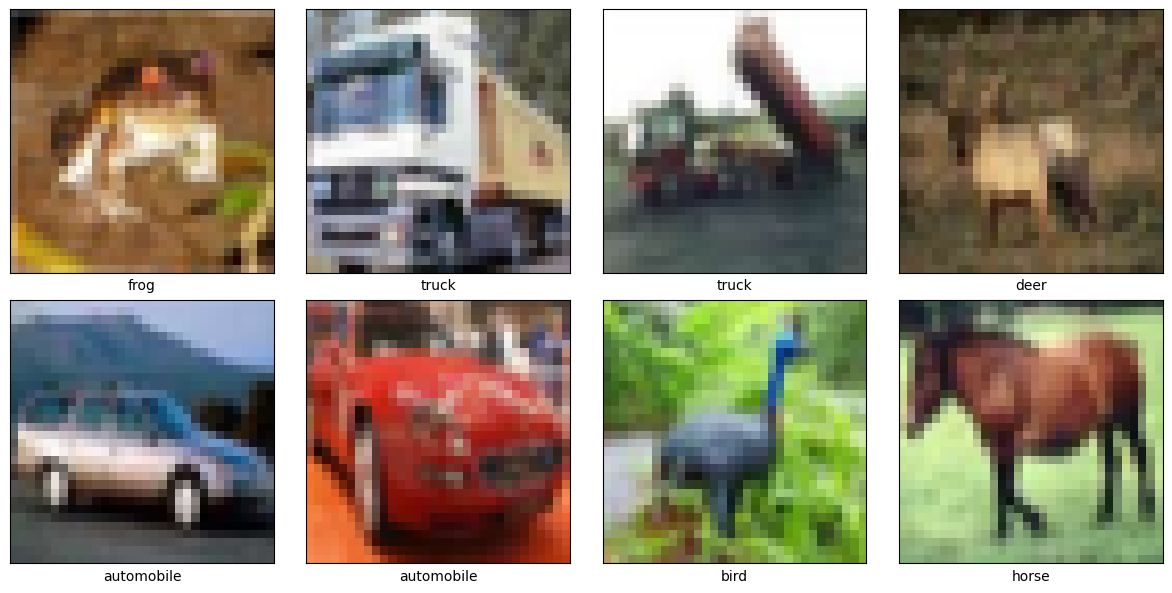

In [25]:
# Bộ dữ liệu CIFAR-10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Kích thước của ảnh và số lớp
IMG_WIDTH = 32
IMG_HEIGHT = 32
NUM_CHANNELS = 3
NUM_CLASSES = 10

print(f"Kích thước tập huấn luyện ban đầu: x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"Kích thước tập kiểm tra ban đầu: x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

# Chuẩn hóa giá trị pixel về khoảng [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Chuyển đổi nhãn sang dạng one-hot encoding
y_train_categorical = to_categorical(y_train, NUM_CLASSES)
y_test_categorical = to_categorical(y_test, NUM_CLASSES)

print(f"Kích thước nhãn huấn luyện sau one-hot: y_train_categorical shape: {y_train_categorical.shape}")
print(f"Kích thước nhãn kiểm tra sau one-hot: y_test_categorical shape: {y_test_categorical.shape}")

# Tên các lớp trong CIFAR-10 
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Hiển thị vài ảnh mẫu
plt.figure(figsize=(12,6))
for i in range(8):
    plt.subplot(2,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(class_names[y_train[i][0]])
plt.tight_layout()
plt.show()

### Xây dựng Mô hình CNN

In [26]:
model = Sequential(name="CIFAR10_CNN_Classifier")

# Lớp Tích chập thứ nhất
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(IMG_HEIGHT, IMG_WIDTH, NUM_CHANNELS)))
# Lớp Gộp thứ nhất
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp Tích chập thứ hai
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'))
# Lớp Gộp thứ hai
model.add(MaxPooling2D(pool_size=(2, 2)))

# Lớp Tích chập thứ ba
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'))
# Lớp Gộp thứ ba
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flattening đầu ra từ các lớp tích chập/gộp để đưa vào lớp Fully Connected
model.add(Flatten())

# Lớp Fully Connected thứ nhất
model.add(Dense(units=128, activation='relu'))

# Lớp Dropout để giảm Overfitting
model.add(Dropout(0.5))

# Lớp Đầu ra
model.add(Dense(units=NUM_CLASSES, activation='softmax'))

### Biên dịch Mô hình 

In [27]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Huấn luyện Mô hình

In [28]:
EPOCHS = 25 
BATCH_SIZE = 64 

# Huấn luyện mô hình
history = model.fit(x_train, y_train_categorical,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(x_test, y_test_categorical), 
                    verbose=1)

Epoch 1/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.3032 - loss: 1.8832 - val_accuracy: 0.5512 - val_loss: 1.2528
Epoch 2/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 27ms/step - accuracy: 0.5340 - loss: 1.3084 - val_accuracy: 0.6307 - val_loss: 1.0369
Epoch 3/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6120 - loss: 1.1056 - val_accuracy: 0.6445 - val_loss: 0.9913
Epoch 4/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 28ms/step - accuracy: 0.6613 - loss: 0.9649 - val_accuracy: 0.6904 - val_loss: 0.8960
Epoch 5/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 30ms/step - accuracy: 0.6899 - loss: 0.8801 - val_accuracy: 0.7225 - val_loss: 0.8166
Epoch 6/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 29ms/step - accuracy: 0.7194 - loss: 0.8169 - val_accuracy: 0.7273 - val_loss: 0.7932
Epoch 7/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 23s 29ms/step - accuracy: 0.7341 - loss: 0.7604 - val_accuracy: 0.7306 - val_loss: 0.7732
Epoch 8/25
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 32ms/step - accuracy: 0.7590 - loss: 0.6959 - 

### Đánh giá Mô hình

In [29]:
# Đánh giá mô hình trên tập test
test_loss, test_accuracy = model.evaluate(x_test, y_test_categorical, verbose=0)

print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")


Test Loss: 0.9441
Test Accuracy: 76.13%


### Ma trận Nhầm lẫn

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


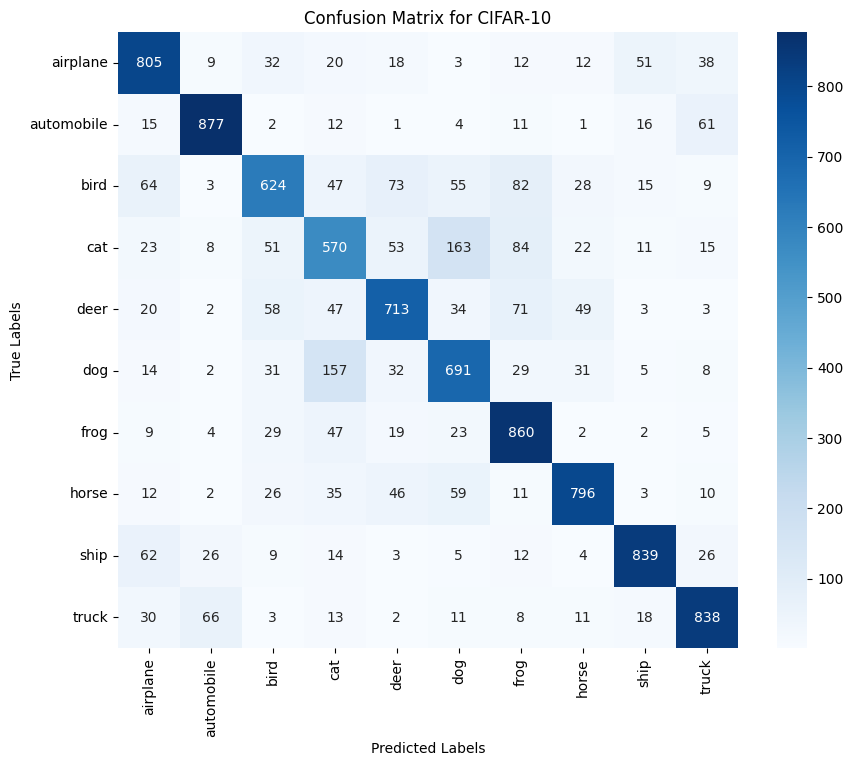

In [30]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_probabilities = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probabilities, axis=1)
y_true_classes = np.argmax(y_test_categorical, axis=1)

# Tính toán ma trận nhầm lẫn
cm = confusion_matrix(y_true_classes, y_pred_classes)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix for CIFAR-10')
plt.show()

### Đồ thị Quá trình Huấn luyện

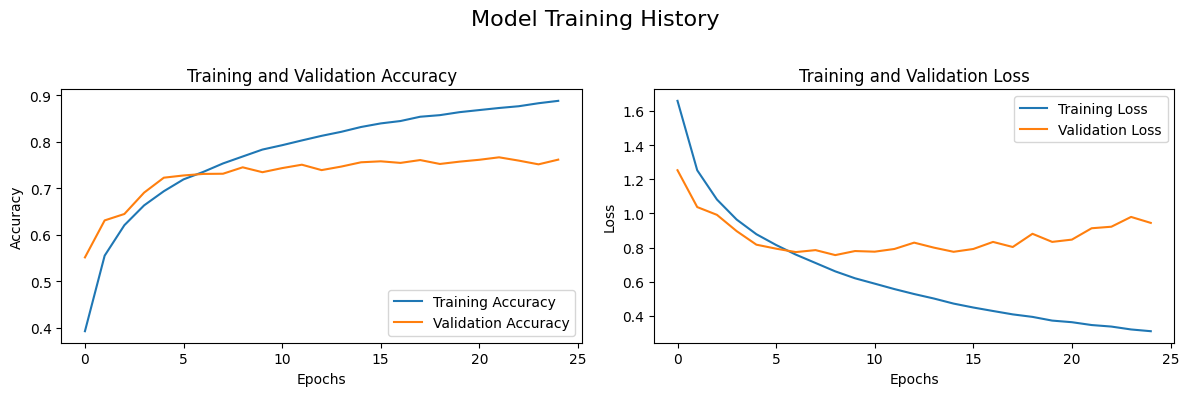

In [31]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 4))

# Đồ thị Accuracy
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

# Đồ thị Loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.suptitle('Model Training History', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Thử nghiệm

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


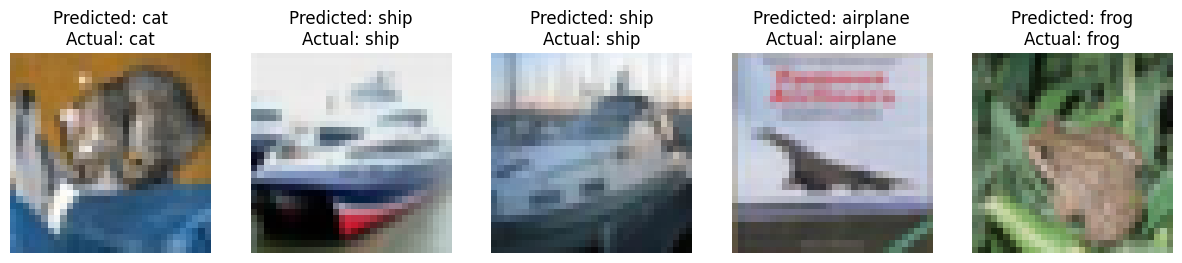

In [32]:
# Lấy một vài ảnh từ tập test để dự đoán
num_predictions = 5
sample_images = x_test[:num_predictions]
sample_labels_actual = y_test[:num_predictions]

predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

plt.figure(figsize=(15, 5))
for i in range(num_predictions):
    plt.subplot(1, num_predictions, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"Predicted: {class_names[predicted_classes[i]]}\nActual: {class_names[sample_labels_actual[i][0]]}")
    plt.axis('off')
plt.show()